In [1]:
pip install pytrends matplotlib pandas seaborn plotly

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 1.1 MB/s eta 0:00:09
   -- ------------------------------------- 0.5/9.8 MB 1.1 MB/s eta 0:00:09
   --- ------------------------------------ 0.8/9.8 MB 1.0 MB/s eta 0:00:09
   ---- ----------------------------------- 1.0/9.8 MB 1.0 MB/s eta 0:00:09
   ---- ----------------------------------- 1.0/9.8 MB 1.0 MB/s eta 0:00:09
   ----- ---------------------------------- 1.3/9.8 MB 964.6 kB/s eta 0:00:09
   ----- ---------------------------------- 1.3/9.8 MB 964.6 kB/s eta 0:00:09
   ------ --------------------------------- 1.6/9.8 MB 841.4 kB/s eta 0:00:10
   ------ --------------------------------- 1.6/9.8 MB 841.4 kB/s eta 0:00:10
   ------- -------------------------------- 1.8/9.8 MB 807.8 kB/s eta 0:00:10
   ------- ------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

# setup pytrend library and keywokds define

In [38]:
pytrends = TrendReq(hl = 'en-US', tz = 360)
keyword = "cloud computing"

# Data Request

In [41]:
pytrends.build_payload([keyword], cat = 0,timeframe = 'today 12-m', geo = '',gprop = '')

# country wise interest

In [42]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by = keyword,ascending = False). head(15)

C:\Users\VERSHA\AppData\Local\Temp\ipykernel_7588\4237842116.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




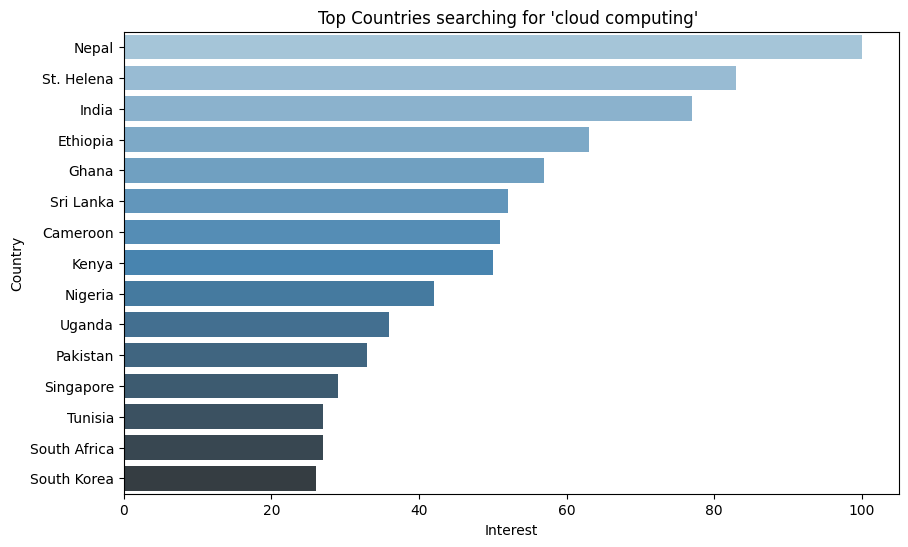

In [43]:
plt.figure(figsize = (10,6))
sns.barplot(x = region_data[keyword], y = region_data.index, palette = "Blues_d")
plt.title(f"Top Countries searching for '{keyword}' ")
plt.xlabel("Interest")
plt.ylabel("Country")
plt.show()

# time wise interest

In [61]:
time_df = pytrends.interest_over_time()

C:\Users\VERSHA\AppData\Local\Programs\Python\Python313\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



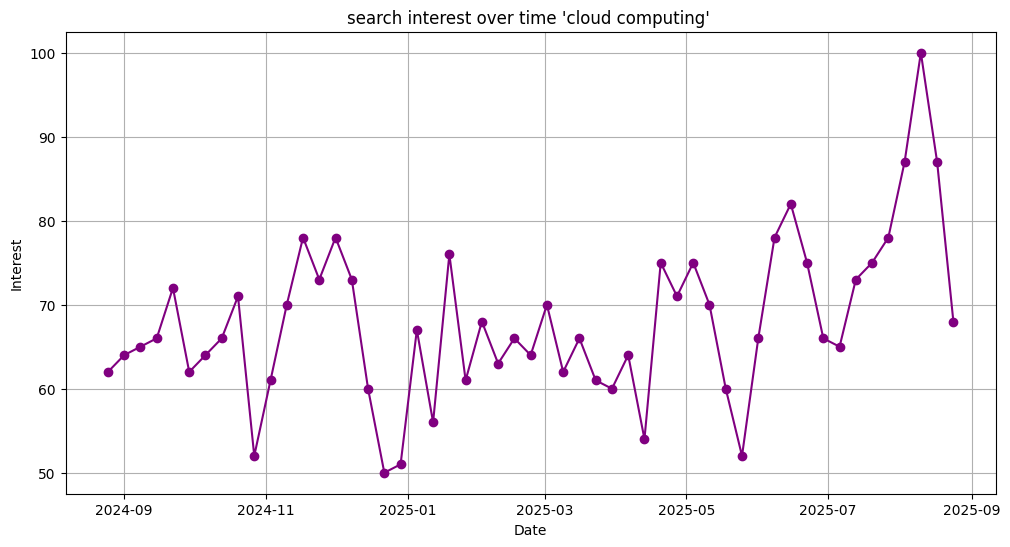

In [63]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index, time_df[keyword], marker = 'o', color = 'purple')
plt.title(f"search interest over time '{keyword}' ")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.show()

# Multiple keywords compare

In [67]:
kw_list = ["cloud computing", "data science", "Machine learning"]
pytrends.build_payload(kw_list, cat = 0, timeframe = 'today 12-m', geo = '', gprop = '')

C:\Users\VERSHA\AppData\Local\Programs\Python\Python313\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



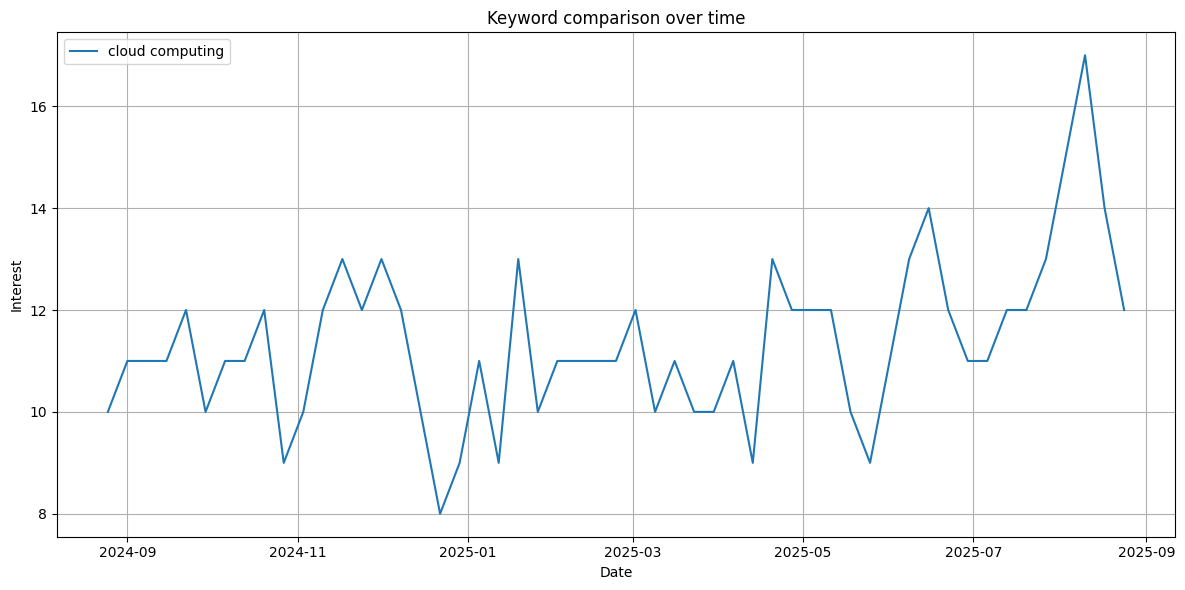

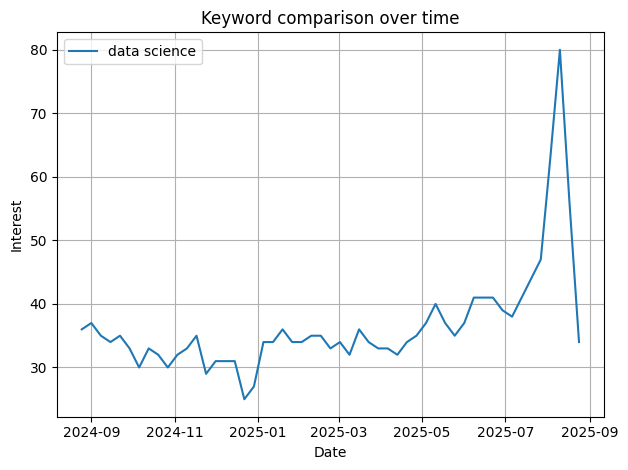

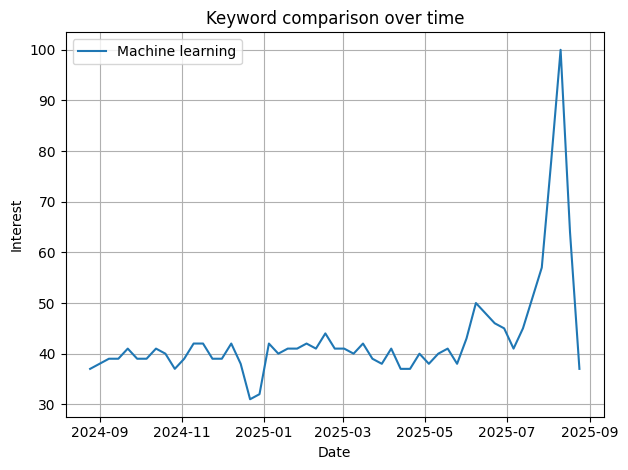

In [73]:
compare_df = pytrends.interest_over_time()
plt.figure(figsize=(12,6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], label = kw)
    plt.title("Keyword comparison over time")
    plt.xlabel("Date")
    plt.ylabel("Interest")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()